<a href="https://colab.research.google.com/github/kiuwuw/Pembelajaran-Mesin-Rahmad-Dwirizki-Olders-2211533005/blob/main/Apriori_Assosiative_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Kode ini memuat library yang diperlukan untuk analisis data (pandas, numpy), algoritma Apriori (mlxtend.frequent_patterns), dan visualisasi (matplotlib). warnings.filterwarnings('ignore') digunakan untuk mengabaikan peringatan agar output lebih bersih.

In [ ]:
df = pd.read_csv('retail_dataset.csv', sep=',')
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


Membaca data transaksi dari file CSV dan menampilkan 10 baris pertama untuk melihat sekilas isi data.

In [ ]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{'Pencil', nan, 'Bagel', 'Bread', 'Milk', 'Eggs', 'Diaper', 'Cheese', 'Wine', 'Meat'}


 Mengumpulkan semua item unik dari dataset untuk mengetahui item apa saja yang ada dalam transaksi.

In [ ]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

Mengubah setiap transaksi menjadi format one-hot encoding (1 untuk item yang ada dan 0 untuk item yang tidak ada), sehingga data siap untuk algoritma Apriori.

In [ ]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 20 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.869841,(nan)
3,0.361905,(Pencil)
4,0.504762,(Bread)
5,0.406349,(Diaper)
6,0.438095,(Eggs)


Menjalankan algoritma Apriori untuk menemukan itemset yang sering muncul dengan minimum support 0.2 (itemset muncul di setidaknya 20% transaksi).

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902,-0.147743
1,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
2,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141,-0.115976
3,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053


Menghasilkan aturan asosiasi dari itemset yang sering muncul dengan minimum confidence 0.6 (60%), yang menunjukkan kekuatan aturan.

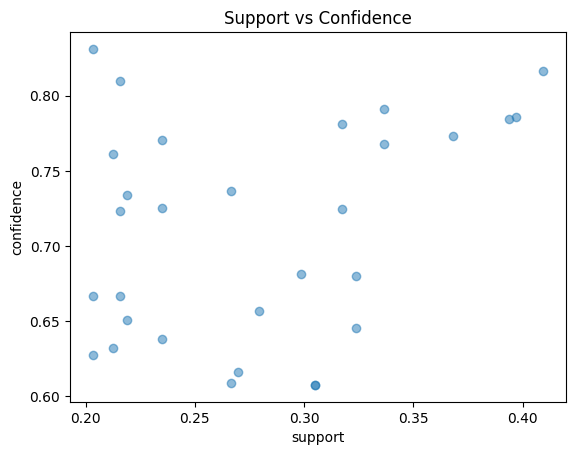

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Membuat scatter plot untuk memvisualisasikan hubungan antara support dan confidence dari aturan asosiasi yang ditemukan, membantu memahami pola dan distribusi aturan.